<a href="https://colab.research.google.com/github/Nischhal9205/Python-and-ML-for-OIL-and-GAS-Industry/blob/main/FDTP_NB%2C_KNN%2C_DT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import dataset, cleaning, encoding

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Python & AI ML/Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder

categorical_cols=['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Order_Time',
       'Vehicle_Type']
lb=LabelEncoder()
for col in categorical_cols:
  df[col] = lb.fit_transform(df[col])

df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


In [6]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

Normalization

In [9]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
cont_cols=['Distance', 'Delivery_Time']
df[cont_cols] = scaler.fit_transform(df[cont_cols])

Feature engineering - creating binary categories

In [10]:
threshold = df['Delivery_Time'].median()
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > threshold else 0)

Split train-test

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay

x = df.drop(['Delivery_Status', 'Delivery_Time', 'Order_ID', 'Customer_Location', 'Restaurant_Location' ], axis=1)
y = df['Delivery_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Naive bayes

              precision    recall  f1-score   support

           0       0.44      0.42      0.43        19
           1       0.50      0.52      0.51        21

    accuracy                           0.47        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40

[[ 8 11]
 [10 11]]


<Axes: >

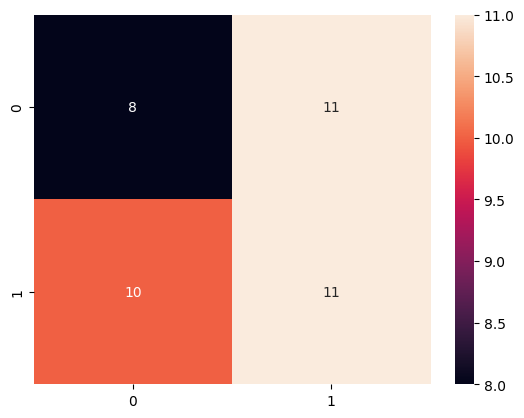

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred_nb=gnb.predict(x_test)

print(classification_report(y_test,y_pred_nb))

from sklearn.metrics import confusion_matrix

cf_nb=confusion_matrix(y_test,y_pred_nb)
print(cf_nb)

sns.heatmap(cf_nb,annot=True)

KNN

Best K: {'n_neighbors': 5}
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        19
           1       0.50      0.48      0.49        21

    accuracy                           0.47        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.48      0.47      0.48        40

[[ 9 10]
 [11 10]]


<Axes: >

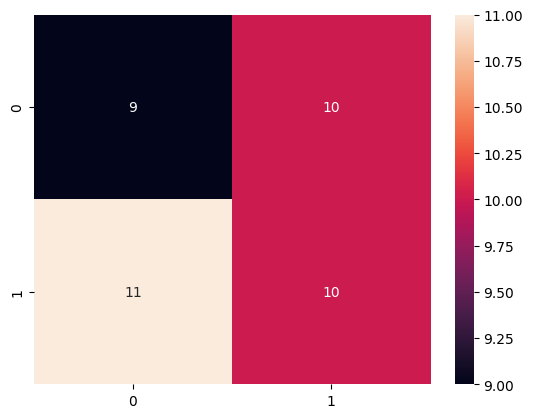

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(3, 15)}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid=params, cv=5)
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.predict(X_test)

print(f"Best K: {grid_knn.best_params_}")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

cf_knn=confusion_matrix(y_test,y_pred_knn)
print(cf_knn)

sns.heatmap(cf_knn,annot=True)

Decision tree

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.32      0.35        19
           1       0.48      0.57      0.52        21

    accuracy                           0.45        40
   macro avg       0.44      0.44      0.44        40
weighted avg       0.44      0.45      0.44        40

[[ 6 13]
 [ 9 12]]


<Axes: >

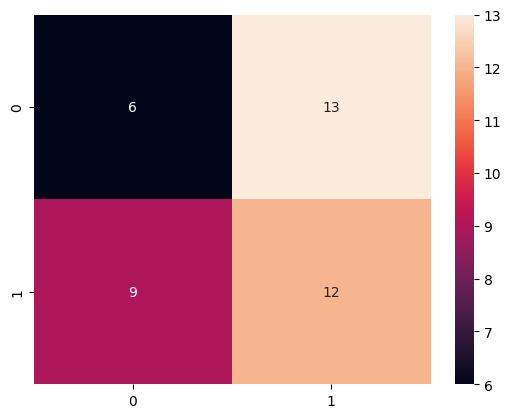

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

cf_dt=confusion_matrix(y_test,y_pred_dt)
print(cf_dt)

sns.heatmap(cf_dt,annot=True)

Model comparison|

<Figure size 1000x600 with 0 Axes>

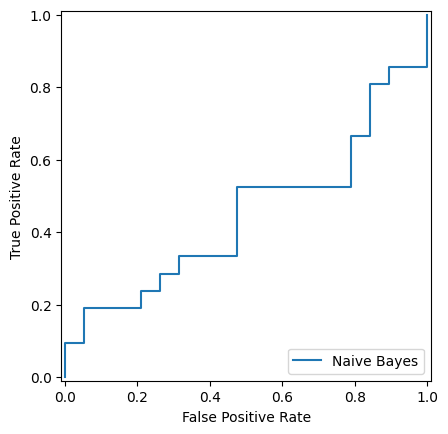

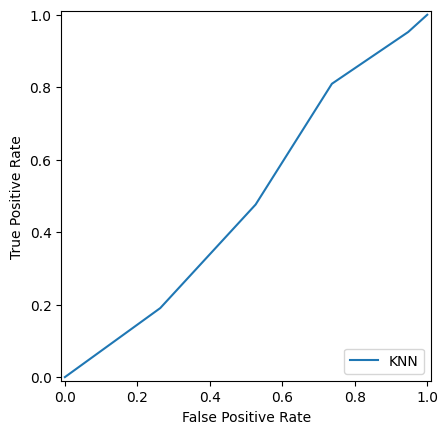

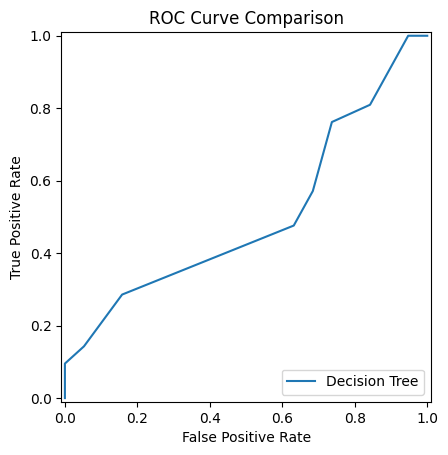

In [20]:
def plot_roc(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=label).plot()

plt.figure(figsize=(10, 6))
plot_roc(gnb, X_test, y_test, 'Naive Bayes')
plot_roc(grid_knn.best_estimator_, X_test, y_test, 'KNN')
plot_roc(dt_model, X_test, y_test, 'Decision Tree')
plt.title('ROC Curve Comparison')
plt.show()